## Implementación de ML-Lib para la Premier League

1. Series de tiempo:
   Se busca analizar el puntaje que indica el rendimiento de los equipos a lo largo de la temporada para predecir cuál será el rendimiento en los siguientes partidos. Claramente, el periodo de estimación dependerá de los parámetros \( p \), \( q \), \( d \) y \( s \) seleccionados en el modelo. Donde:
   - \( p \): es el número de rezagos (lags) de la serie temporal.
   - \( d \): es el grado de diferenciación que se aplica para hacer que la serie temporal sea estacionaria.
   - \( q \): es el tamaño de la ventana de la media móvil.
   - \( s \): es la periodicidad estacional de la serie temporal.

La selección adecuada de estos parámetros es crucial para construir un modelo de series de tiempo que capture de manera precisa las tendencias y patrones estacionales en el rendimiento de los jugadores, y así poder realizar predicciones fiables para los próximos partidos.

# Serie de Tiempo

In [0]:
# File location and type
file_location = "/FileStore/tables/Equipos_Match_Fusion_Results_FINAL.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(data)

game_id,team_id,team_name,team_rating,date,won_corners,won_contest,total_tackle,aerial_lost,possession_percentage,accurate_pass,total_pass,shot_off_target,total_offside,blocked_scoring_att,ontarget_scoring_att,aerial_won,goals,att_pen_goal,post_scoring_att,Salvadas Portero,Total Shots,Foults,Yellow Cards,Red Cards,Resultado
1190174,13,Arsenal FC,7.30714285714286,11/08/2017,9,16,23,18,70.0,538,632,9,5,8,10,18,4,0,0,6,27,9,0,0,Ganó
1190175,211,Brighton & Hove Albion,6.30857142857143,12/08/2017,3,7,10,13,21.8,130,213,2,6,2,2,13,0,0,0,2,6,6,0,0,Perdió
1190176,15,Chelsea FC,6.39642857142857,12/08/2017,8,5,10,22,61.9,446,521,6,2,7,6,17,2,0,0,4,19,16,3,2,Perdió
1190177,162,Crystal Palace FC,6.53615384615385,12/08/2017,12,18,24,16,56.7,304,391,7,0,3,4,18,0,0,0,4,14,7,1,0,Perdió
1190178,31,Everton FC,6.99357142857143,12/08/2017,6,1,17,25,61.6,392,497,3,2,2,4,19,1,0,0,3,9,13,1,0,Ganó
1190181,18,Southampton FC,6.83357142857143,12/08/2017,13,6,12,18,59.6,432,518,16,0,11,2,17,0,0,1,2,29,10,2,0,Empate
1190182,27,Watford FC,6.69142857142857,12/08/2017,3,11,19,25,45.6,277,395,4,3,1,4,22,3,0,0,1,9,14,0,0,Empate
1190183,175,West Bromwich Albion FC,7.02857142857143,12/08/2017,8,1,19,18,28.7,157,242,9,2,1,6,12,1,0,0,5,16,15,3,0,Ganó
1190179,32,Manchester United FC,7.67785714285714,13/08/2017,11,23,14,13,55.4,417,493,8,1,8,5,23,4,0,1,1,22,19,2,0,Ganó
1190180,23,Newcastle United FC,6.28142857142857,13/08/2017,5,4,12,15,26.9,157,245,4,2,0,2,16,0,0,0,2,6,6,1,1,Perdió


In [0]:
from pyspark.sql.functions import col, to_date
import pandas as pd

# Filtrar los datos para el equipo 'Manchester City FC'
man_city_data = data.filter(col('team_name') == 'Leicester City')

# Convertir la columna 'team_rating' a tipo numérico (float en este caso)
man_city_data = man_city_data.withColumn('team_rating', col('team_rating').cast('float'))

# Convertir la columna 'date' a formato de fecha
man_city_data = man_city_data.withColumn('date', to_date(col('date'), 'dd/MM/yyyy'))

# Ordenar los datos por fecha
man_city_data = man_city_data.orderBy('date')

# Convertir el DataFrame de Spark a un DataFrame de pandas
man_city_data = man_city_data.toPandas()

# Establecer la columna 'date' como índice
man_city_data.set_index('date', inplace=True)

# Mostrar los primeros registros para verificar
display(man_city_data)


game_id,team_id,team_name,team_rating,won_corners,won_contest,total_tackle,aerial_lost,possession_percentage,accurate_pass,total_pass,shot_off_target,total_offside,blocked_scoring_att,ontarget_scoring_att,aerial_won,goals,att_pen_goal,post_scoring_att,Salvadas Portero,Total Shots,Foults,Yellow Cards,Red Cards,Resultado
1190174,14,Leicester City,6.6464286,4,5,17,18,30.0,167,263,3,3,0,3,18,3,0,0,0,6,12,1,0,Perdió
1190187,14,Leicester City,7.0753846,6,8,11,16,45.2,332,427,4,1,6,4,17,2,0,0,2,14,8,1,0,Ganó
1190197,14,Leicester City,6.6814284,3,10,22,22,30.9,208,300,5,3,2,4,24,0,0,0,4,11,7,2,0,Perdió
1190220,14,Leicester City,6.5035715,2,7,18,7,40.4,259,347,3,1,3,2,12,1,1,0,1,8,11,1,0,Perdió
1190194,14,Leicester City,6.652143,4,13,8,24,40.2,247,344,4,1,5,1,27,1,1,0,0,10,6,1,0,Empate
1190222,14,Leicester City,6.5585713,3,10,15,30,43.3,237,360,2,4,3,7,24,2,0,0,5,12,13,3,0,Perdió
1190251,14,Leicester City,6.8492856,5,10,19,24,39.1,221,347,4,3,3,1,27,0,0,0,1,8,10,0,0,Empate
1190269,14,Leicester City,6.67,4,14,21,20,57.0,367,486,4,1,4,3,19,1,0,0,2,11,13,2,0,Empate
1190233,14,Leicester City,7.0723076,6,13,23,18,44.2,276,381,3,3,2,6,20,2,0,0,5,11,9,1,0,Ganó
1190248,14,Leicester City,7.115,3,8,14,22,40.4,214,324,5,4,1,3,20,2,0,0,1,9,6,0,0,Ganó


In [0]:
display(man_city_data.index)

Index([2017-08-11, 2017-08-19, 2017-08-26, 2017-09-09, 2017-09-16, 2017-09-23,
       2017-09-30, 2017-10-16, 2017-10-21, 2017-10-29, 2017-11-04, 2017-11-18,
       2017-11-24, 2017-11-28, 2017-12-02, 2017-12-09, 2017-12-13, 2017-12-16,
       2017-12-23, 2017-12-26, 2017-12-30, 2018-01-01, 2018-01-13, 2018-01-20,
       2018-01-31, 2018-02-03, 2018-02-10, 2018-02-24, 2018-03-03, 2018-03-10,
       2018-03-31, 2018-04-07, 2018-04-14, 2018-04-19, 2018-04-28, 2018-05-05,
       2018-05-09, 2018-05-13],
      dtype='object', name='date')

In [0]:
date_diffs = man_city_data.index.to_series().diff().dropna()

# Calcula la diferencia promedio de días
average_diff_days = date_diffs.mean().days

print(f"Diferencia promedio de días: {average_diff_days}")

Diferencia promedio de días: 7


La periodicidad promedio en de 7 días, es decir una semana. El intervalo o ciclo se dará en inte cada 4 semanas.

In [0]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import plotly.subplots as sp
import plotly.graph_objs as go

## Evaluación de estacionariedad

Intuitivamente el concepto se refiere a que las propiedades de la serie no varían con respecto al tiempo. En otras palabras significa que su variación (la forma en la que cambia) no cambia en función del tiempo.

Esto tiene una importante implicación a la hora de predecir.Pues de tener estacionariedad, estariamos prediciendo que las características estadísticas de nuestra serie de tiempo serán las mismas en el futuro como en el pasado.

Para esto evaluamos el comportamiento de la **media** y la **desviación estandar**.

In [0]:
rolling_mean = man_city_data['team_rating'].rolling(window=9).mean()
rolling_std = man_city_data['team_rating'].rolling(window=9).std()

# Crear trazos para los datos, la media móvil y las bandas de desviación estándar
trace_data = go.Scatter(x=man_city_data.index, y=man_city_data['team_rating'], mode='lines', name='Team Rating')
trace_mean = go.Scatter(x=man_city_data.index, y=rolling_mean, mode='lines', name='Media movil', line=dict(color='green'))
trace_std_plus = go.Scatter(x=man_city_data.index, y=rolling_mean + rolling_std, mode='lines', name='Media + 1 Std', line=dict(color='red'))
trace_std_minus = go.Scatter(x=man_city_data.index, y=rolling_mean - rolling_std, mode='lines', name='Media - 1 Std', line=dict(color='red'))

# Crear la figura y agregar los trazos
fig = go.Figure()
fig.add_trace(trace_data)
fig.add_trace(trace_mean)
fig.add_trace(trace_std_plus)
fig.add_trace(trace_std_minus)

# Actualizar el diseño de la figura
fig.update_layout(title='Team Rating with Rolling Mean and Standard Deviation',
                  xaxis_title='Date',
                  yaxis_title='Team Rating',
                  height=600,
                  width=1000)

# Mostrar la figura
fig.show()

In [0]:
max(man_city_data['team_rating'])

Out[129]: 7.302856922149658

In [0]:
min(man_city_data['team_rating'])

Out[130]: 6.024285793304443

Vemos que la media y la desviación estandar parece tener un comportamiento estable a lo largo del tiempo.

Adicionalmente podemos analizar las tendecias, el nivel y los residuales.

In [0]:
decomposition = seasonal_decompose(man_city_data['team_rating'], model='additive', period=4, extrapolate_trend='freq')

# Calcular la media y la desviación estándar para los datos observados
mean_observed = decomposition.observed.mean()
std_observed = decomposition.observed.std()

# Crear una figura con subplots
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.02,
                       subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

# Agregar trazos a la figura
fig.add_trace(go.Scatter(x=man_city_data.index, y=decomposition.observed, mode='lines', name='Observed'), row=1, col=1)


fig.add_trace(go.Scatter(x=man_city_data.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=man_city_data.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=man_city_data.index, y=decomposition.resid, mode='markers', name='Residual', marker=dict(color='blue')), row=4, col=1)

# Actualizar el diseño de la figura
fig.update_layout(height=800, width=1000, title_text="Seasonal Decomposition of Time Series")
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Residual", row=4, col=1)

# Mostrar la figura
fig.show()

In [0]:
decomposition.resid.mean()

Out[132]: 0.01754900228646061

In [0]:
decomposition = seasonal_decompose(man_city_data['team_rating'], model='multiplicative', period=4, extrapolate_trend='freq')
decomposition.resid.mean()


Out[133]: 1.0026760393961704

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import find_peaks
peaks, _ = find_peaks(decomposition.seasonal)

# Calcular las diferencias entre los picos
peak_intervals = np.diff(peaks)

# Imprimir los índices de los picos y los intervalos entre ellos
print("Índices de los picos:", peaks)
print("Intervalos entre picos:", peak_intervals)
print("Intervalo promedio entre picos:", peak_intervals.mean())

Índices de los picos: [ 1  5  9 13 17 21 25 29 33]
Intervalos entre picos: [4 4 4 4 4 4 4 4]
Intervalo promedio entre picos: 4.0



### Trend

Observa si la tendencia es creciente, decreciente o estable. En la gráfica, la tendencia parece disminuir ligeramente con algunas fluctuaciones, indicando que, en general, los valores de team_rating están disminuyendo a lo largo del tiempo. Esto puede sugerir untra transformación 

### Seasonal

Observa los ciclos estacionales repetitivos. En la gráfica, la estacionalidad muestra fluctuaciones que se repiten aproximadamente cada año. Esto indica que hay factores estacionales que afectan los valores de team_rating de manera consistente. Esto nos permitirá definir uno de los parametros del **SARIMA**. 

### Residuals

Los residuos parecen estar dispersos alrededor de cero, lo cual es un buen signo de que la descomposición ha capturado bien la tendencia y la estacionalidad.


Estamos utilizando esta ecuación para generar series temporales simuladas con diferentes valores de 𝜌  para ver cómo cada valor afecta la serie. **Esto nos ayuda a entender mejor cómo se comportan las series temporales con diferentes niveles de dependencia en sus valores pasados.**

**𝜌** es el coeficiente que mide la influencia del valor anterior de la serie \(x[t-1]\) en el valor actual \(x[t]\).

Conocer la dependencia temporal nos ayuda a identificar patrones en los datos, como tendencias y estacionalidades, que son esenciales para realizar predicciones y tomar decisiones informadas.

In [0]:
man_city_pd = man_city_data

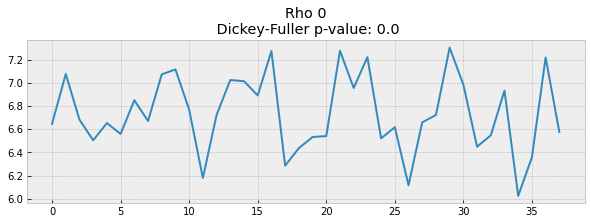

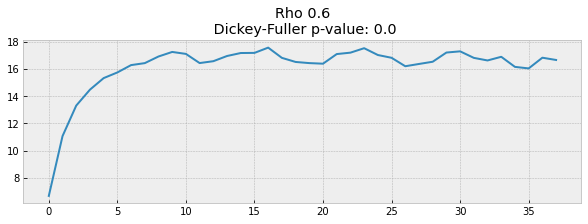

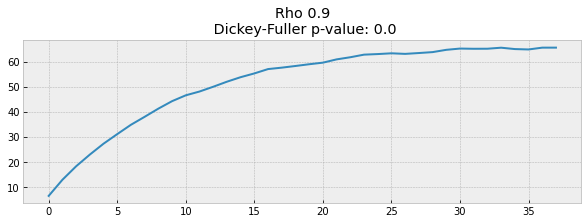

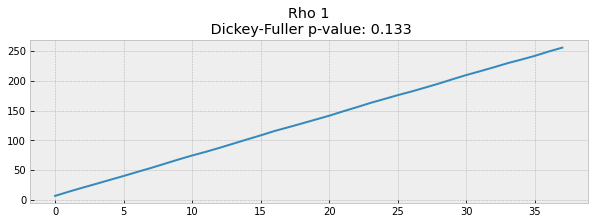

In [0]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


# Definir la función para plotear y realizar la prueba de Dickey-Fuller
def plotProcess(x, rho=0):
    w = x.copy()
    for t in range(1, len(x)):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        p_value = adfuller(x)[1]
        plt.title(f"Rho {rho}\n Dickey-Fuller p-value: {round(p_value, 3)}")
        plt.show()

# Obtener los valores de 'team_rating'
x = man_city_pd['team_rating'].values

# Convertir a numpy array
x = np.array(x, dtype='float64')

# Realizar la prueba para diferentes valores de rho
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(x.copy(), rho=rho)

In [0]:
# Realizar la prueba de Dickey-Fuller
result = adfuller(x)

# Imprimir los resultados de la prueba de Dickey-Fuller
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.857396
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


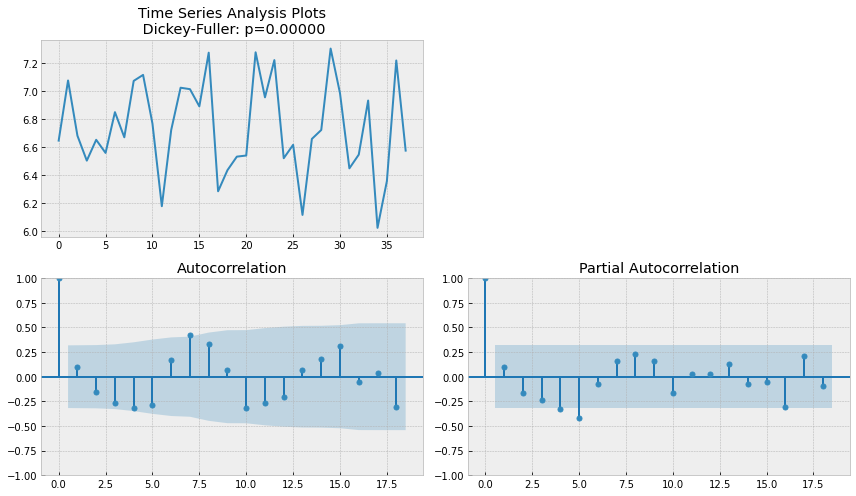

In [0]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=1)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, method='ywm')
        plt.tight_layout()

# Obtener los valores de 'team_rating'
x = man_city_pd['team_rating'].values

# Convertir a pandas series
x_series = pd.Series(x)

# Calcular el número máximo de lags permitido
max_lags = len(x_series) // 2 - 1

# Graficar y realizar la prueba de Dickey-Fuller
tsplot(x_series, lags=max_lags)

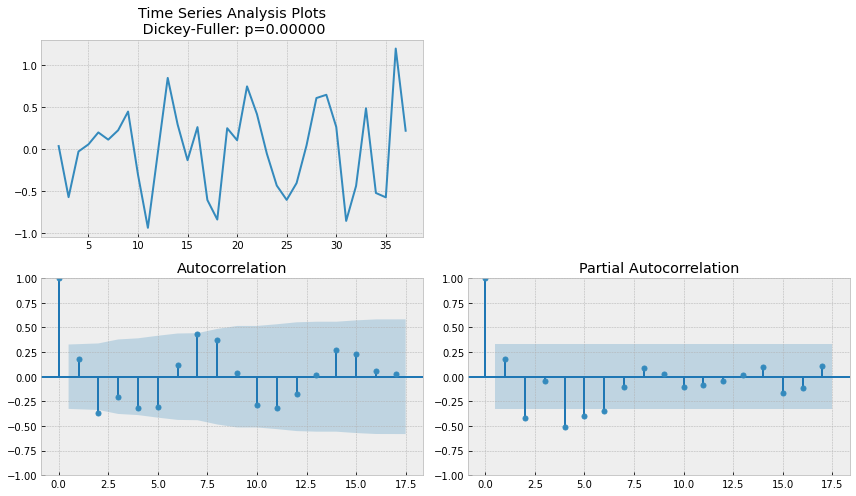

In [0]:
x_diff_seasonal = x_series - x_series.shift(2)
x_diff_seasonal = x_diff_seasonal.dropna()
max_lags = len(x_diff_seasonal) // 2 - 1
tsplot(x_diff_seasonal, lags=max_lags)

In [0]:
from itertools import product
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# Definir valores iniciales
ps = range(2, 6)
d = 1
qs = range(0, 2) 
Ps = range(0, 2)
D = 0
Qs = range(0, 2)
s = 4  


In [0]:
# Crear lista de posibles combinaciones
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(parameters_list)
print("Number of parameter combinations:", len(parameters_list))

[(2, 0, 0, 0), (2, 0, 0, 1), (2, 0, 1, 0), (2, 0, 1, 1), (2, 1, 0, 0), (2, 1, 0, 1), (2, 1, 1, 0), (2, 1, 1, 1), (3, 0, 0, 0), (3, 0, 0, 1), (3, 0, 1, 0), (3, 0, 1, 1), (3, 1, 0, 0), (3, 1, 0, 1), (3, 1, 1, 0), (3, 1, 1, 1), (4, 0, 0, 0), (4, 0, 0, 1), (4, 0, 1, 0), (4, 0, 1, 1), (4, 1, 0, 0), (4, 1, 0, 1), (4, 1, 1, 0), (4, 1, 1, 1), (5, 0, 0, 0), (5, 0, 0, 1), (5, 0, 1, 0), (5, 0, 1, 1), (5, 1, 0, 0), (5, 1, 0, 1), (5, 1, 1, 0), (5, 1, 1, 1)]
Number of parameter combinations: 32


## Parámetros del modelo ARIMA

Se usa el modelo ARIMA ya que pudimos identificar que nuestra serie no es estacional. No existen ciclos o periodicidades semanales o mensuales.

##### Orden: Una tupla (p, d, q) que especifica el orden del modelo ARIMA:
- p: El número de observaciones rezagadas incluidas en el modelo (parte autorregresiva).
- d: El número de veces que las observaciones originales son diferenciadas (parte de diferenciación).
- q: El tamaño de la ventana de promedio móvil (parte de promedio móvil).

##### Orden estacional: Una tupla (P, D, Q, s) que especifica el orden del componente estacional del modelo:
- P: El número de observaciones rezagadas incluidas en el modelo estacional (parte autorregresiva estacional).
- D: El número de diferencias estacionales.
- Q: El tamaño de la ventana de promedio móvil en el modelo estacional.
- s: La periodicidad (número de períodos en una temporada).


Las tuplas generadas siguen la estructura (ps, qs, Ps, Qs) 
- (p, d, q) (P, D , Q , S)

In [0]:
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(man_city_pd['team_rating'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        
    except:
        continue
    aic = model.aic
    # guardar el mejor modelo, AIC y parametros
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # Ordener de manera creciente, a menor valor de AIC es MEJOR
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

display(result_table)

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueW

parameters,aic
"List(5, 1, 0, 1)",24.290933099299806
"List(5, 1, 0, 0)",24.76078996093778
"List(4, 1, 0, 1)",27.498257933972894
"List(3, 0, 1, 0)",29.969521794608998
"List(3, 1, 1, 0)",30.127833578862184
"List(3, 0, 1, 1)",31.163925952657056
"List(2, 1, 1, 1)",31.29286155337822
"List(3, 1, 1, 1)",31.82080207688297
"List(2, 1, 1, 0)",31.847365193978096
"List(4, 1, 0, 0)",32.344017558865986


In [0]:
best_model.summary()

SARIMAX Results 
 
 Dep. Variable: team_rating No. Observations: 38 
 
 
 Model: SARIMAX(5, 1, 1)x(0, 0, 1, 4) Log Likelihood -4.145 
 
 
 Date: Fri, 31 May 2024 AIC 24.291 
 
 
 Time: 02:24:54 BIC 37.178 
 
 
 Sample: 0 HQIC 28.834 
 
 
 - 38 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 -0.2741 0.155 -1.773 0.076 -0.577 0.029 
 
 
 ar.L2 -0.2622 0.143 -1.839 0.066 -0.542 0.017 
 
 
 ar.L3 -0.2041 0.148 -1.379 0.168 -0.494 0.086 
 
 
 ar.L4 -0.7248 0.248 -2.920 0.003 -1.211 -0.238 
 
 
 ar.L5 -0.4804 0.210 -2.286 0.022 -0.892 -0.068 
 
 
 ma.L1 -0.8829 0.154 -5.726 0.000 -1.185 -0.581 
 
 
 ma.S.L4 0.6572 0.411 1.599 0.110 -0.149 1.463 
 
 
 sigma2 0.0617 0.025 2.497 0.013 0.013 0.110 
 
 
 
 
 Ljung-Box (L1) (Q): 0.06 Jarque-Bera (JB): 2.25 
 
 
 Prob(Q): 0.80 Prob(JB): 0.32 
 
 
 Heteroskedasticity (H): 1.78 Skew: 0.31 
 
 
 Prob(H) (two-sided): 0.33 Kurtosis: 1.97 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [0]:
man_city_data['team_rating']

Out[145]: date
2017-08-11    6.646429
2017-08-19    7.075385
2017-08-26    6.681428
2017-09-09    6.503572
2017-09-16    6.652143
2017-09-23    6.558571
2017-09-30    6.849286
2017-10-16    6.670000
2017-10-21    7.072308
2017-10-29    7.115000
2017-11-04    6.767857
2017-11-18    6.178571
2017-11-24    6.722308
2017-11-28    7.023571
2017-12-02    7.013333
2017-12-09    6.890714
2017-12-13    7.273571
2017-12-16    6.285000
2017-12-23    6.435714
2017-12-26    6.532143
2017-12-30    6.540000
2018-01-01    7.276429
2018-01-13    6.955000
2018-01-20    7.220769
2018-01-31    6.520714
2018-02-03    6.616428
2018-02-10    6.116428
2018-02-24    6.658462
2018-03-03    6.722143
2018-03-10    7.302857
2018-03-31    6.984286
2018-04-07    6.448571
2018-04-14    6.546429
2018-04-19    6.932143
2018-04-28    6.024286
2018-05-05    6.357857
2018-05-09    7.217857
2018-05-13    6.575000
Name: team_rating, dtype: float32

In [0]:
best_model.fittedvalues[2:]

Out[146]: date
2017-08-26    6.969639
2017-09-09    6.703532
2017-09-16    6.578994
2017-09-23    6.685577
2017-09-30    6.601690
2017-10-16    6.823367
2017-10-21    6.750807
2017-10-29    6.766481
2017-11-04    6.790516
2017-11-18    6.553361
2017-11-24    6.526464
2017-11-28    6.779801
2017-12-02    6.824681
2017-12-09    6.915961
2017-12-13    6.851054
2017-12-16    6.738078
2017-12-23    6.544201
2017-12-26    6.613255
2017-12-30    6.770929
2018-01-01    6.814865
2018-01-13    7.066682
2018-01-20    6.836684
2018-01-31    6.712810
2018-02-03    6.602786
2018-02-10    6.487939
2018-02-24    6.695708
2018-03-03    6.912019
2018-03-10    6.968131
2018-03-31    7.049417
2018-04-07    6.743116
2018-04-14    6.479799
2018-04-19    6.599360
2018-04-28    6.603067
2018-05-05    6.655103
2018-05-09    7.029919
2018-05-13    7.081710
dtype: float64

Out[154]: [<matplotlib.lines.Line2D at 0x7f7cb524fe80>]

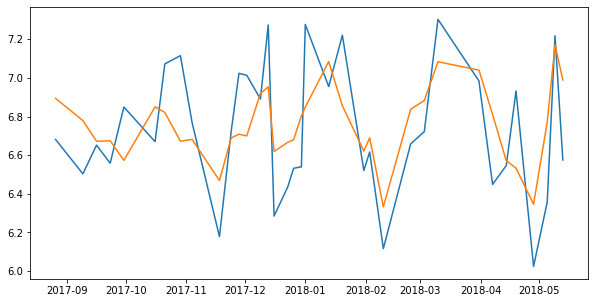

In [0]:
# Set figure size
plt.figure(figsize=(10, 5))  

# Plot the data
plt.plot(man_city_data['team_rating'][2:])
plt.plot(best_model.fittedvalues[2:])


In [0]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

# Calcular los errores
fitted_values = best_model.fittedvalues
mape = mean_absolute_percentage_error(man_city_pd['team_rating'], fitted_values)
mae2 = median_absolute_error(man_city_pd['team_rating'], fitted_values)


print(f"mean_absolute_percentage_error: {mape}") # no robusta
print(f"median_absolute_error: {mae2}") # robusta

mean_absolute_percentage_error: 0.05944849757592226
median_absolute_error: 0.24106909049886438


/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



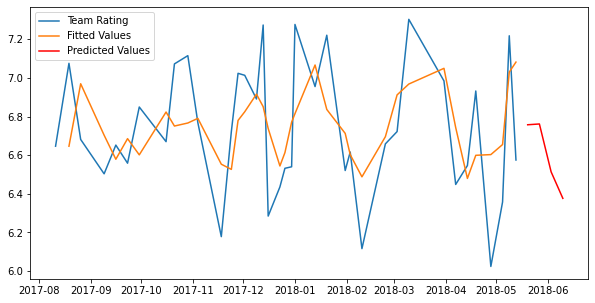

In [0]:

# Asegúrate de que el índice sea datetime
man_city_pd.index = pd.to_datetime(man_city_pd.index)

future_dates = pd.date_range(start=man_city_pd.index[-1] + pd.Timedelta(days=1), periods=4, freq='W')
future_df = pd.DataFrame(index=future_dates, columns=man_city_pd.columns)
extended_df = pd.concat([man_city_pd, future_df])

# Realizar la predicción utilizando índices de posición
start_idx = len(man_city_pd)
end_idx = start_idx + len(future_dates) - 1

# Obtener las predicciones
predictions = best_model.predict(start=start_idx, end=end_idx, typ='levels')

# Asignar las predicciones al DataFrame extendido
extended_df['team_rating'].iloc[start_idx:end_idx + 1] = predictions

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Plotea los datos reales
plt.plot(man_city_pd['team_rating'], label='Team Rating')

# Plotea los valores ajustados del modelo
fitted_values = best_model.fittedvalues
plt.plot(fitted_values[1:], label='Fitted Values')

# Plotea los valores predichos
plt.plot(extended_df.index[start_idx:end_idx + 1], predictions, label='Predicted Values', color='red')

# Mostrar la gráfica con leyenda
plt.legend()
plt.show()